In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\Priyanshu\Data Science YT\datasets\test_scores.csv")
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


Build a model for predicting posttest scores

# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [4]:
df.drop('student_id',axis=1,inplace=True)

In [5]:
df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [6]:
df.school.value_counts()

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64

In [7]:
df.school_setting.value_counts()

Urban       906
Suburban    717
Rural       510
Name: school_setting, dtype: int64

In [8]:
df.school_type.value_counts()

Public        1582
Non-public     551
Name: school_type, dtype: int64

<AxesSubplot:xlabel='school_type'>

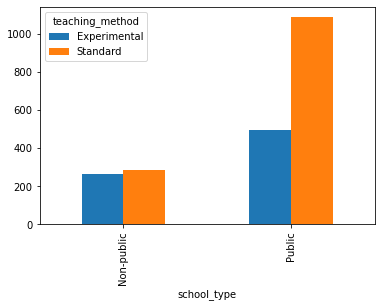

In [9]:
pd.crosstab(df.school_type,df.teaching_method).plot(kind='bar')

Public school are ahead of non public for teaching method to be experimental

In [10]:
df.classroom.value_counts()

18K    31
ZBH    30
A93    30
Q0E    30
YTB    30
       ..
KR1    15
IQN    15
SSP    15
JGD    14
197    14
Name: classroom, Length: 97, dtype: int64

In [11]:
df.drop('classroom',axis=1,inplace=True)

In [12]:
df.teaching_method.value_counts()

Standard        1373
Experimental     760
Name: teaching_method, dtype: int64

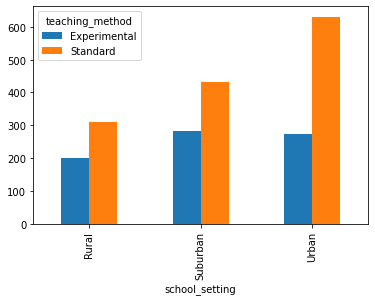

In [13]:
pd.crosstab(df.school_setting,df.teaching_method).plot(kind='bar')
plt.show()

Experimental method of teaching is much less than standard teaching method in any type of school setting

In [14]:
df.lunch.value_counts()

Does not qualify                    1215
Qualifies for reduced/free lunch     918
Name: lunch, dtype: int64

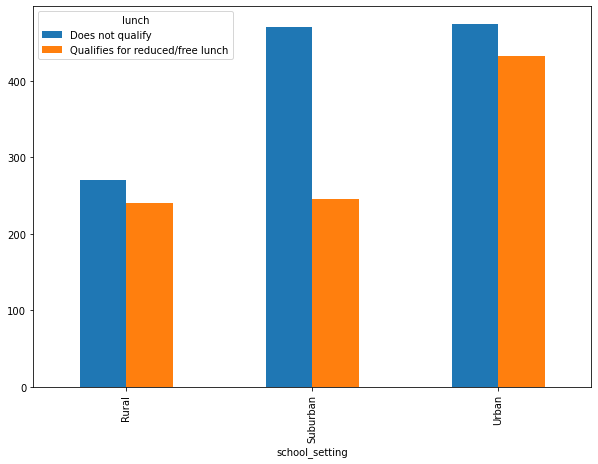

In [15]:
pd.crosstab(df.school_setting,df.lunch).plot(kind='bar',figsize=(10,7))
plt.show()

Free lunch is available for more students in the urban setting

<AxesSubplot:xlabel='school_setting'>

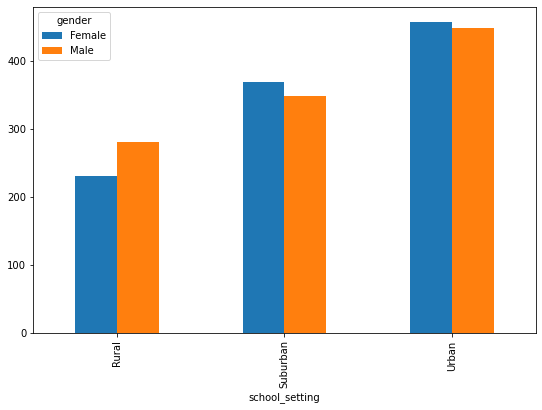

In [16]:
pd.crosstab(df.school_setting,df.gender).plot(kind='bar',figsize=(9,6))

Gender diversity is almost similar in different settings

# Dimensionality Reduction

In [17]:
sch_cnt=df.school.value_counts(ascending=False)
sch_cnt

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64

In [18]:
sch_below_100=sch_cnt[sch_cnt<100]
sch_below_100

IDGFP    94
UAGPU    87
UUUQX    84
OJOBU    81
CIMBB    74
ZMNYA    69
GOKXL    64
LAYPA    57
KFZMY    52
VHDHF    51
FBUMG    46
ANKYI    41
Name: school, dtype: int64

In [19]:
df.school=df.school.apply(lambda x:'other' if x in sch_below_100 else x)
df.school.value_counts()

other    800
GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
Name: school, dtype: int64

Schools having count less than 100 have been labeled as 'other'

# Encoding Categorical Variables

In [20]:
df_enc=pd.get_dummies(df,drop_first=True)
df_enc

,n_student,pretest,posttest,school_CUQAM,school_DNQDD,school_GJJHK,school_GOOBU,school_KZKKE,school_QOQTS,school_UKPGS,school_VKWQH,school_VVTVA,school_ZOWMK,school_other,school_setting_Suburban,school_setting_Urban,school_type_Public,teaching_method_Standard,gender_Male,lunch_Qualifies for reduced/free lunch
0,20.0,62.0,72.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1,20.0,66.0,79.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,20.0,64.0,76.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
3,20.0,61.0,77.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4,20.0,64.0,76.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,30.0,39.0,55.0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
2129,30.0,38.0,46.0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1
2130,30.0,45.0,51.0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1
2131,30.0,46.0,53.0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1


# Outlier Detection and Removal

C:\Users\priya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n_student'>

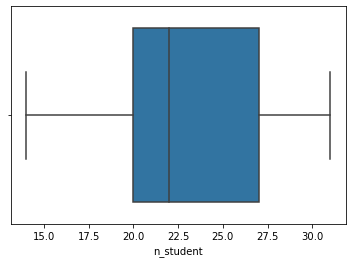

In [21]:
sns.boxplot(df.n_student)

C:\Users\priya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pretest'>

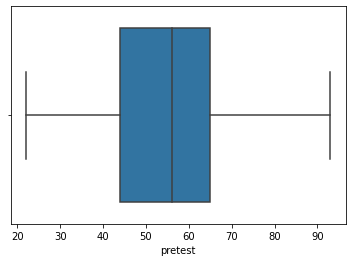

In [22]:
sns.boxplot(df.pretest)

C:\Users\priya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='posttest'>

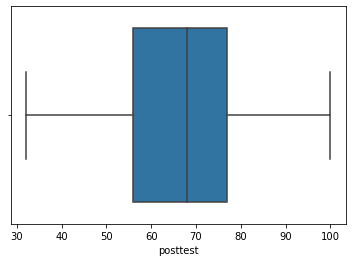

In [23]:
sns.boxplot(df.posttest)

There are no outliers in the dataset

# Splitting Dependent and Independent Variables

In [24]:
x=df_enc.drop('posttest',axis=1)
x.head()

,n_student,pretest,school_CUQAM,school_DNQDD,school_GJJHK,school_GOOBU,school_KZKKE,school_QOQTS,school_UKPGS,school_VKWQH,school_VVTVA,school_ZOWMK,school_other,school_setting_Suburban,school_setting_Urban,school_type_Public,teaching_method_Standard,gender_Male,lunch_Qualifies for reduced/free lunch
0,20.0,62.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1,20.0,66.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,20.0,64.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
3,20.0,61.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4,20.0,64.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0


In [25]:
y=df_enc['posttest']
y

0       72.0
1       79.0
2       76.0
3       77.0
4       76.0
        ... 
2128    55.0
2129    46.0
2130    51.0
2131    53.0
2132    48.0
Name: posttest, Length: 2133, dtype: float64

# Feature Scaling

In [26]:
# Using standard scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_s=sc.fit_transform(x)
x_s

array([[-0.66144654,  0.51947714, -0.22981172, ...,  0.74399759,
        -1.00989423, -0.86922699],
       [-0.66144654,  0.8144641 , -0.22981172, ...,  0.74399759,
        -1.00989423, -0.86922699],
       [-0.66144654,  0.66697062, -0.22981172, ...,  0.74399759,
         0.9902027 , -0.86922699],
       ...,
       [ 1.70379314, -0.73421741, -0.22981172, ...,  0.74399759,
        -1.00989423,  1.15044748],
       [ 1.70379314, -0.66047067, -0.22981172, ...,  0.74399759,
         0.9902027 ,  1.15044748],
       [ 1.70379314, -1.02920437, -0.22981172, ...,  0.74399759,
         0.9902027 ,  1.15044748]])

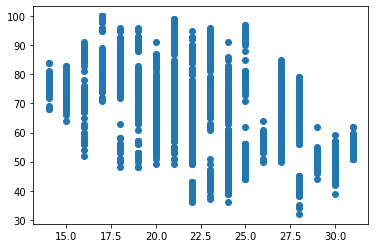

In [28]:
plt.scatter(x.iloc[:,0],y)

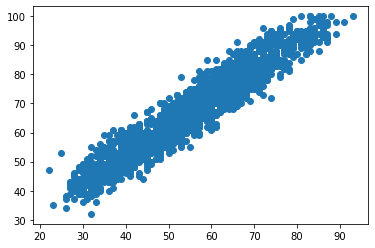

In [29]:
plt.scatter(x.iloc[:,1],y)

# Deploying Model

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [34]:
score1=cross_val_score(LinearRegression(),x,y,cv=3)
np.average(score1)

0.9190958088479935

In [35]:
score2=cross_val_score(SVR(),x,y,cv=3)
np.average(score2)

0.8593869829595263

In [36]:
score3=cross_val_score(RandomForestRegressor(),x,y,cv=3)
np.average(score3)

0.8733285421438447

In [42]:
score4=cross_val_score(DecisionTreeRegressor(),x,y,cv=3)
np.average(score4)

0.8222976671036698

In [56]:
accd={
    'LinearRegression':[0.9190958088479935],
    'SVR':[0.8593869829595263],
    'RandomForest':[0.8733285421438447],
    'DecisionTree':[0.8222976671036698]
}

In [57]:
acc=pd.DataFrame(data=accd)
acc

,LinearRegression,SVR,RandomForest,DecisionTree
0,0.919096,0.859387,0.873329,0.822298
